C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Tableau des coefficients de la régression logistique:
             Variable  Coefficient
0                 Age     0.013427
1           RestingBP     0.001253
2         Cholesterol    -0.004901
3           FastingBS     0.940471
4               MaxHR    -0.005233
5             Oldpeak     0.461906
6               Sex_F    -0.666607
7               Sex_M     0.566116
8   ChestPainType_ASY     0.961357
9   ChestPainType_ATA    -0.460819
10  ChestPainType_NAP    -0.495424
11   ChestPainType_TA    -0.105605
12     RestingECG_LVH     0.187094
13  RestingECG_Normal    -0.031148
14      RestingECG_ST    -0.256436
15   ExerciseAngina_N    -0.591566
16   ExerciseAngina_Y     0.491076
17      ST_Slope_Down    -0.110495
18      ST_Slope_Flat     1.173378
19        ST_Slope_Up    -1.163373

Évaluation du modèle:
Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90   

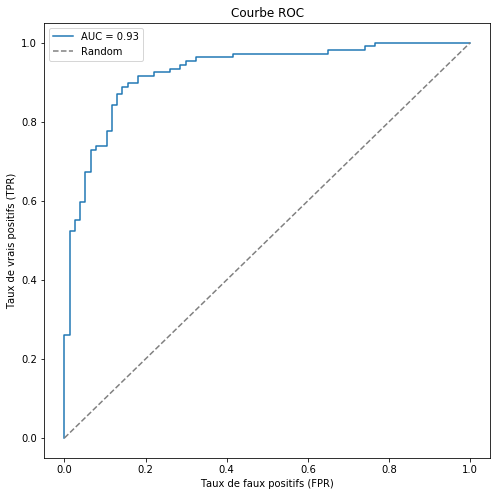

In [14]:
if __name__ == "__main__":
    
    # Charger le fichier CSV
    chemin = 'heart.csv'
    data = pd.read_csv(chemin)
    
    # Préparation des données
    X, y = prepare_data(data, 'HeartDisease')
    
    # Division des données
    X_train, X_test, y_train, y_test = divise_data(X, y)
    
    # Entraînement du modèle
    model = logistic_regression(X_train, y_train)
    
    # Affichage des coefficients
    coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
    print("Tableau des coefficients de la régression logistique:")
    print(coefficients_df)
    
    # Évaluation du modèle
    y_pred = evaluate_model(model, X_test, y_test)
    
    # Calcul de la probabilité des prédictions pour la courbe ROC
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Affichage de la courbe ROC
    plot_roc(y_test, y_prob)